In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler # Corrected import
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
%matplotlib inline

In [ ]:
heartdf= pd.read_csv('/content/heart_disease_prediction.csv')

In [ ]:
pd.read_csv

In [ ]:
heartdf.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
heartdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


some values are object have to check it out


In [87]:
heartdf.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


checking mean and median and their difference shouldn't be much and there are some value which are near 0

to seeing any difference will do some visual reprenstation before cleaning


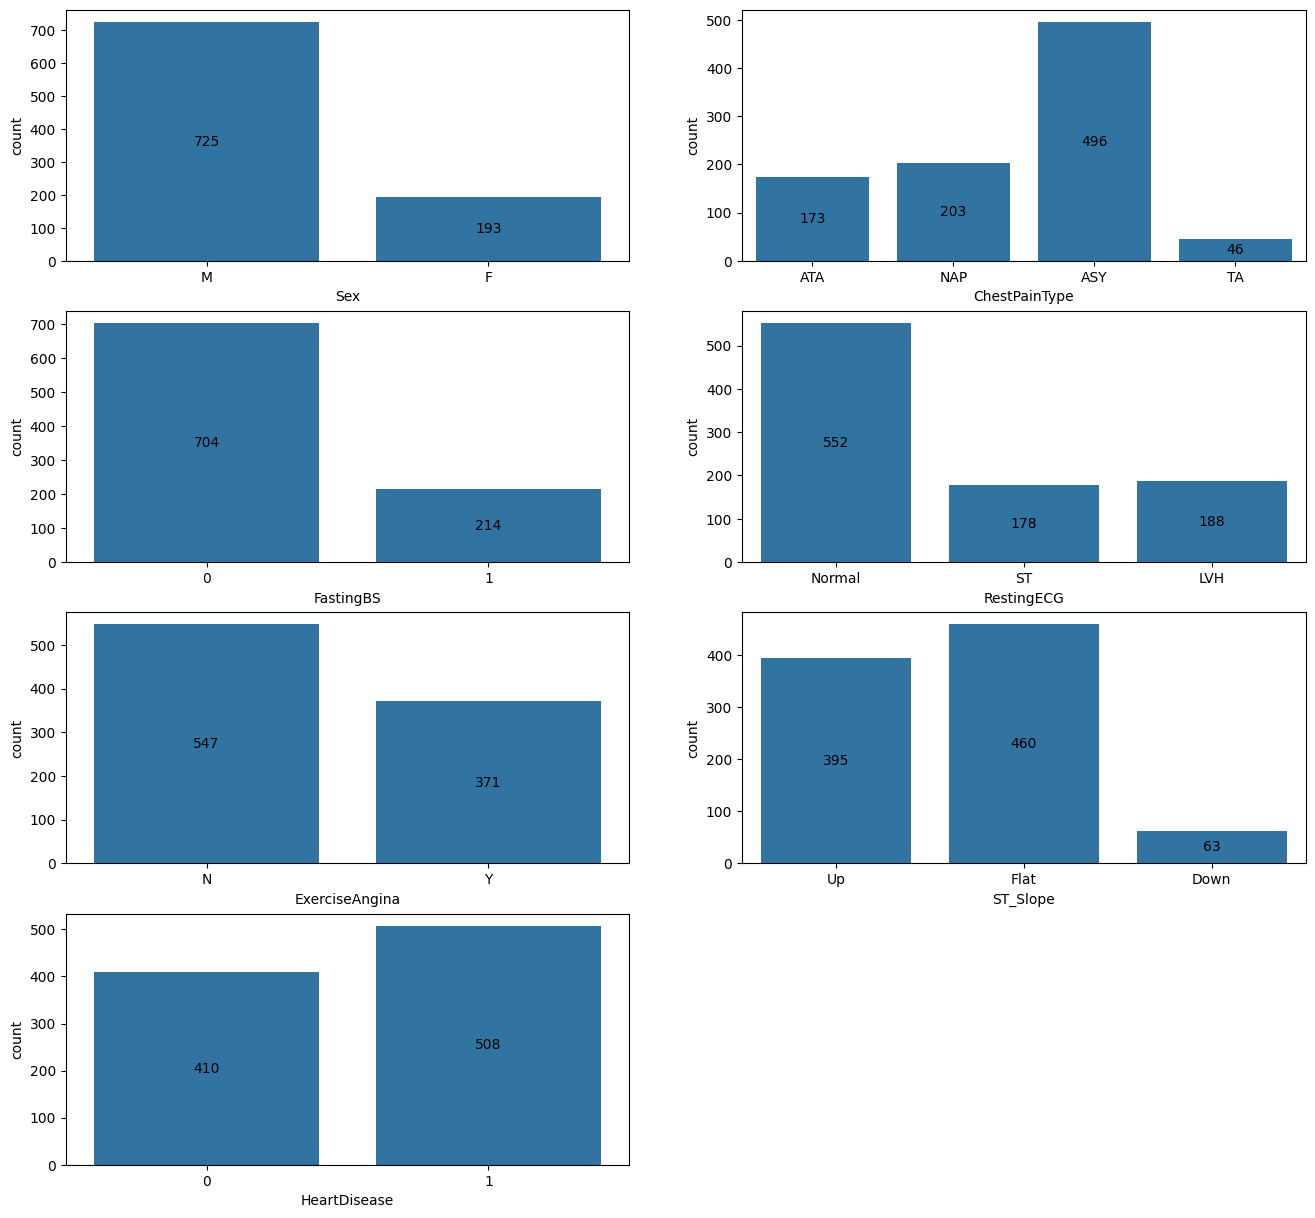

In [ ]:
categorical_cols = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope", "HeartDisease"]

fig = plt.figure(figsize=(16,15))

for idx, col in enumerate(categorical_cols):
    ax = plt.subplot(4, 2, idx+1)
    sns.countplot(x=heartdf[col], ax=ax)
    # add data labels to each bar
    for container in ax.containers:
        ax.bar_label(container, label_type="center")

These count plots give us insights into the distribution of our categorical variables:

Sex: The dataset contains significantly more males (725) than females (193)
ChestPainType: “ASY” (asymptomatic) is the most common chest pain type
FastingBS: Most patients have normal fasting blood sugar levels (0)
RestingECG: "Normal" is the most common result
ExerciseAngina: Most patients do not experience exercise-induced angina
ST_Slope: "Flat" and "Up" are the most common, with very few "Down" cases
HeartDisease: The target variable is reasonably balanced, with slightly more positive cases

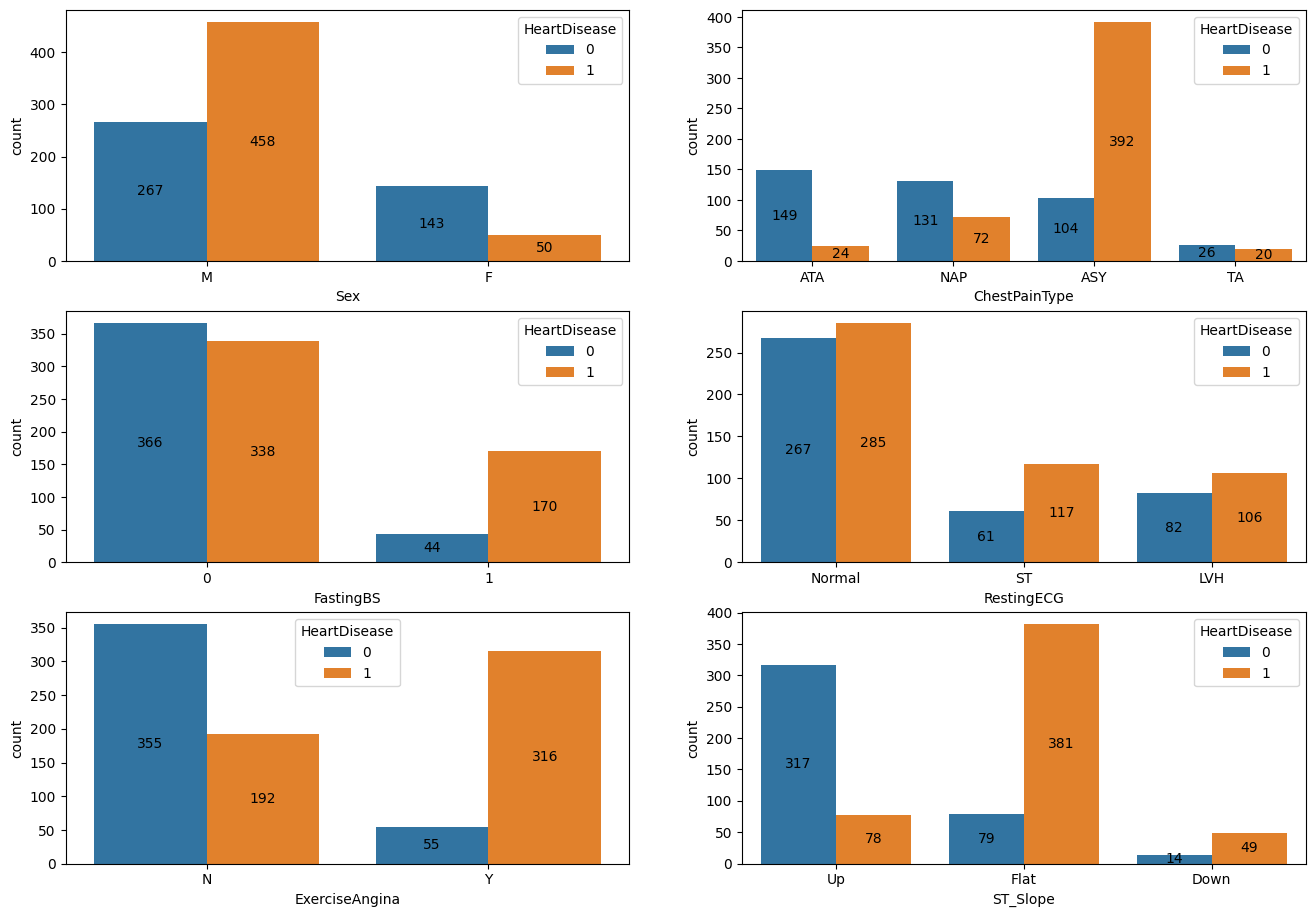

In [ ]:
fig = plt.figure(figsize=(16,15))

for idx, col in enumerate(categorical_cols[:-1]):
    ax = plt.subplot(4, 2, idx+1)
    # group by HeartDisease
    sns.countplot(x=heartdf[col], hue=heartdf["HeartDisease"], ax=ax)
    # add data labels to each bar
    for container in ax.containers:
        ax.bar_label(container, label_type="center")

Sex: Males have a higher prevalence of heart disease in this dataset
ChestPainType: “ASY” (asymptomatic) is strongly associated with heart disease
FastingBS: Higher fasting blood sugar is associated with heart disease
RestingECG: “ST” type is more associated with heart disease than the “Normal” type
ExerciseAngina: Strong association between exercise-induced angina (”Y”) and heart disease
ST_Slope: “Flat” slope is strongly associated with heart disease, while “Up” slope is associated with no heart disease

In [ ]:
heartdf[heartdf['RestingBP']==0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 449 to 449
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1 non-null      int64  
 1   Sex             1 non-null      object 
 2   ChestPainType   1 non-null      object 
 3   RestingBP       1 non-null      int64  
 4   Cholesterol     1 non-null      int64  
 5   FastingBS       1 non-null      int64  
 6   RestingECG      1 non-null      object 
 7   MaxHR           1 non-null      int64  
 8   ExerciseAngina  1 non-null      object 
 9   Oldpeak         1 non-null      float64
 10  ST_Slope        1 non-null      object 
 11  HeartDisease    1 non-null      int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 104.0+ bytes


In [ ]:
heartdf[heartdf['Cholesterol']==0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 293 to 536
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             172 non-null    int64  
 1   Sex             172 non-null    object 
 2   ChestPainType   172 non-null    object 
 3   RestingBP       172 non-null    int64  
 4   Cholesterol     172 non-null    int64  
 5   FastingBS       172 non-null    int64  
 6   RestingECG      172 non-null    object 
 7   MaxHR           172 non-null    int64  
 8   ExerciseAngina  172 non-null    object 
 9   Oldpeak         172 non-null    float64
 10  ST_Slope        172 non-null    object 
 11  HeartDisease    172 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 17.5+ KB


In [ ]:
df_clean = heartdf.copy()

# Remove the record with RestingBP = 0
df_clean = df_clean[df_clean["RestingBP"] != 0]

# Create a mask for patients without heart disease
heartdisease_mask = df_clean["HeartDisease"]==0

# Get cholesterol values for patients with and without heart disease
cholesterol_without_heartdisease = df_clean.loc[heartdisease_mask, "Cholesterol"]
cholesterol_with_heartdisease = df_clean.loc[~heartdisease_mask, "Cholesterol"]

# Replace cholesterol = 0 values with the median for the respective group
df_clean.loc[heartdisease_mask, "Cholesterol"] = cholesterol_without_heartdisease.replace(to_replace = 0, value = cholesterol_without_heartdisease.median())
df_clean.loc[~heartdisease_mask, "Cholesterol"] = cholesterol_with_heartdisease.replace(to_replace = 0, value = cholesterol_with_heartdisease.median())

# Verify our cleaning worked
df_clean[["Cholesterol", "RestingBP"]].describe()

,Cholesterol,RestingBP
count,917.000000,917.000000
mean,239.700109,132.540894
std,54.352727,17.999749
min,85.000000,80.000000
25%,214.000000,120.000000
50%,225.000000,130.000000
75%,267.000000,140.000000
max,603.000000,200.000000


In [ ]:
df_clean=pd.get_dummies(df_clean,drop_first=True)
df_clean.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df_clean)

https://docs.google.com/spreadsheets/d/1yj8uQsCQaDHAMIiSCkEw8l1nq3Zg6athauVLnWiGRlg/edit#gid=0


In [ ]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 917 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                917 non-null    int64  
 1   RestingBP          917 non-null    int64  
 2   Cholesterol        917 non-null    int64  
 3   FastingBS          917 non-null    int64  
 4   MaxHR              917 non-null    int64  
 5   Oldpeak            917 non-null    float64
 6   HeartDisease       917 non-null    int64  
 7   Sex_M              917 non-null    bool   
 8   ChestPainType_ATA  917 non-null    bool   
 9   ChestPainType_NAP  917 non-null    bool   
 10  ChestPainType_TA   917 non-null    bool   
 11  RestingECG_Normal  917 non-null    bool   
 12  RestingECG_ST      917 non-null    bool   
 13  ExerciseAngina_Y   917 non-null    bool   
 14  ST_Slope_Flat      917 non-null    bool   
 15  ST_Slope_Up        917 non-null    bool   
dtypes: bool(9), float64(1), int64(6

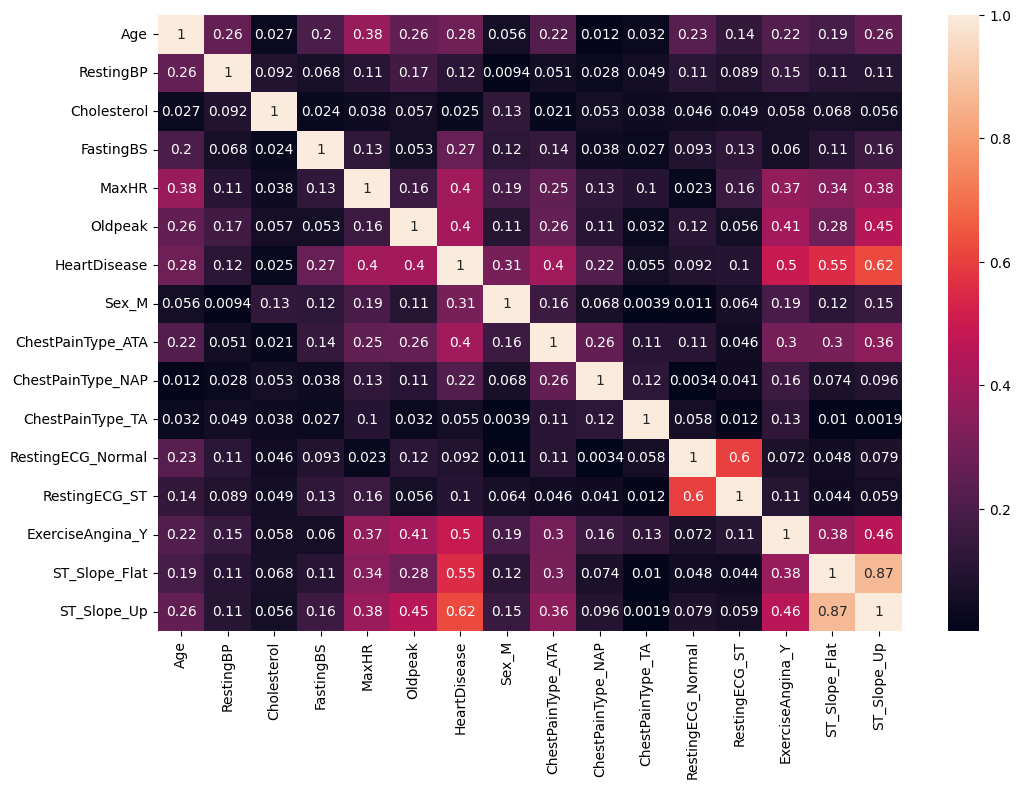

In [ ]:
correlation=abs(df_clean.corr())
plt.figure(figsize=(12,8))
sns.heatmap(correlation,annot=True)
plt.show()

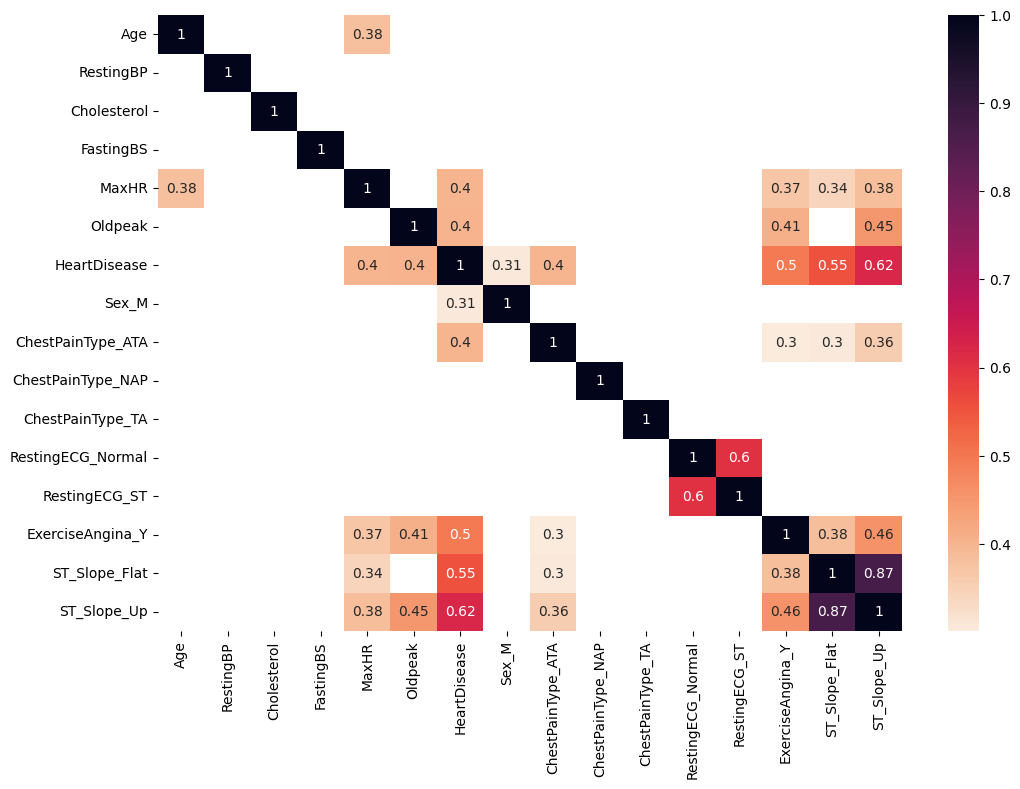

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation[correlation > 0.30], annot=True, cmap="rocket_r")
plt.show()

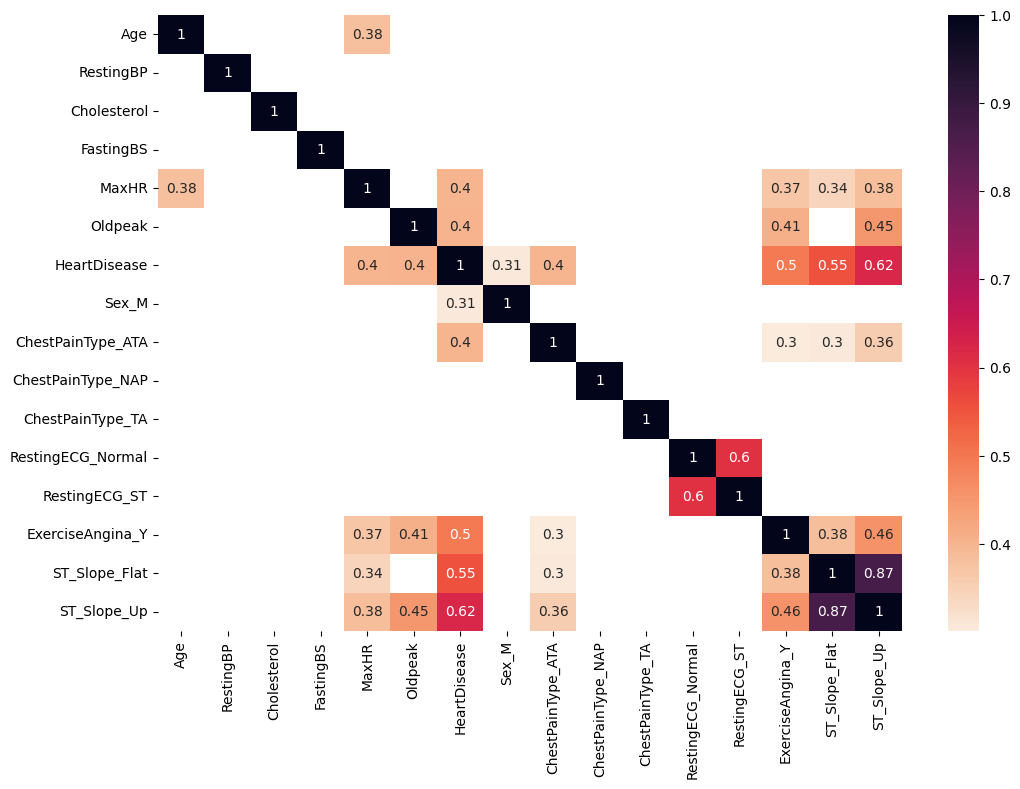

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation[abs(correlation) > 0.30], annot=True, cmap="rocket_r")
plt.show()

In [ ]:
# Split data into training and validation sets
X = df_clean.drop(["HeartDisease"], axis=1)
y = df_clean["HeartDisease"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=417)

features = [
    "MaxHR",
    "Oldpeak",
    "Sex_M",
    "ExerciseAngina_Y",
    "ST_Slope_Flat",
    "ST_Slope_Up"
]

for feature in features:
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train[[feature]], y_train)
    accuracy = knn.score(X_val[[feature]], y_val)
    print(f"The k-NN classifier trained on {feature} and with k = 3 has an accuracy of {accuracy*100:.2f}%")

The k-NN classifier trained on MaxHR and with k = 3 has an accuracy of 66.67%
The k-NN classifier trained on Oldpeak and with k = 3 has an accuracy of 76.81%
The k-NN classifier trained on Sex_M and with k = 3 has an accuracy of 44.93%
The k-NN classifier trained on ExerciseAngina_Y and with k = 3 has an accuracy of 73.19%
The k-NN classifier trained on ST_Slope_Flat and with k = 3 has an accuracy of 81.88%
The k-NN classifier trained on ST_Slope_Up and with k = 3 has an accuracy of 84.06%


In [ ]:
# Scale the features to the same range
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])
X_val_scaled = scaler.transform(X_val[features])

# Build and evaluate the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
accuracy = knn.score(X_val_scaled, y_val)
print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 83.33


In [ ]:
# Prepare data for final model
X = df_clean.drop(["HeartDisease"], axis=1)
y = df_clean["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=417)

features = [
    "Oldpeak",
    #"Sex_M",  # Testing whether this feature helps or hinders accuracy
    "ExerciseAngina_Y",
    "ST_Slope_Flat",
    "ST_Slope_Up"
]

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])

# Define hyperparameter grid
grid_params = {"n_neighbors": range(1, 20),
               "metric": ["minkowski", "manhattan"]
              }

# Perform grid search
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, grid_params, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train)

# Display best parameters
print(f"Best score: {knn_grid.best_score_*100:.2f}%")
print(f"Best parameters: {knn_grid.best_params_}")

Best score: 82.29%
Best parameters: {'metric': 'minkowski', 'n_neighbors': 11}


In [ ]:
# Scale test data
X_test_scaled = scaler.transform(X_test[features])

# Make predictions on test set
predictions = knn_grid.best_estimator_.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy on test set: {accuracy*100:.2f}%")

Model Accuracy on test set: 87.68%


In [ ]:
# Check distribution of Sex_M
print("Distribution of patients by their sex in the entire dataset")
print(X.Sex_M.value_counts())

print("\nDistribution of patients by their sex in the training dataset")
print(X_train.Sex_M.value_counts())

print("\nDistribution of patients by their sex in the test dataset")
print(X_test.Sex_M.value_counts())

Distribution of patients by their sex in the entire dataset
Sex_M
True     724
False    193
Name: count, dtype: int64

Distribution of patients by their sex in the training dataset
Sex_M
True     615
False    164
Name: count, dtype: int64

Distribution of patients by their sex in the test dataset
Sex_M
True     109
False     29
Name: count, dtype: int64


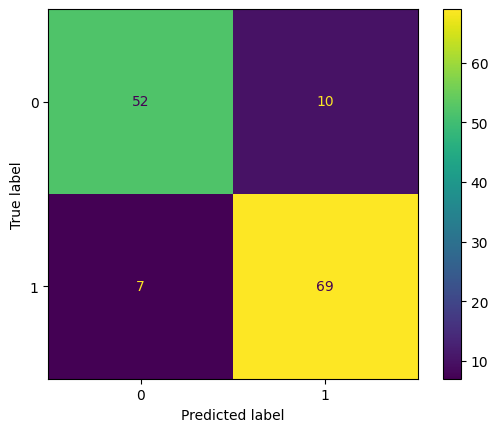

In [ ]:
cf = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cf).plot()
plt.show()